<a href="https://colab.research.google.com/github/sivask01/CMPE257-Fall23-Sivakrishna-Yaganti/blob/homework-2/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LP1

In [ ]:
#### CREDITS: Wencen Wu ####
import numpy as np
import matplotlib.pyplot as plt

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom


def plot_initial_data(top, bottom):
    X1 = [i[0] for i in top]
    Y1 = [i[1] for i in top]
    X2 = [i[0] for i in bottom]
    Y2 = [i[1] for i in bottom]
    plt.scatter(X1,Y1,s = 1)
    plt.scatter(X2,Y2,s = 1)
    plt.show()

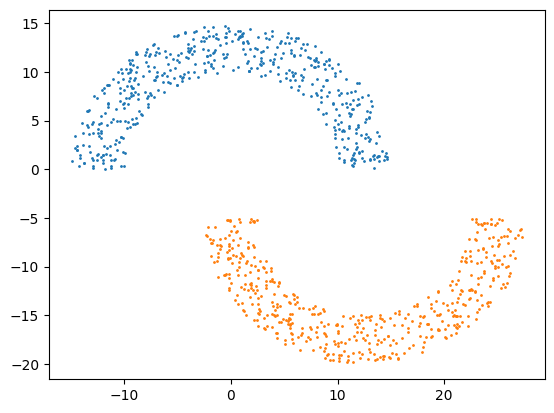

In [ ]:
# PLA Implementation
def pla(data, labels):
    w = np.zeros(data.shape[1])
    iterations = 0
    while True:
        misclassified = 0
        for i in range(len(data)):
            if np.sign(np.dot(w, data[i])) != labels[i]:
                w += labels[i] * data[i]
                misclassified += 1
        iterations += 1
        if misclassified == 0 or iterations > 1000:
            break
    return w

# Linear Regression Implementation
def linear_regression(data, labels):
    pseudo_inverse = np.linalg.pinv(data)
    return np.dot(pseudo_inverse, labels)


def plot_data_with_boundary(top, bottom, w):
    X1 = [i[0] for i in top]
    Y1 = [i[1] for i in top]
    X2 = [i[0] for i in bottom]
    Y2 = [i[1] for i in bottom]

    plt.scatter(X1,Y1,s = 1)
    plt.scatter(X2,Y2,s = 1)
    # plt.show()

    ax = plt.gca()
    xlim = ax.get_xlim()

    # Decision boundary
    x_vals = np.linspace(xlim[0], xlim[1], 100)
    y_vals = (-w[0] - w[1]*x_vals) / w[2]

    plt.plot(x_vals, y_vals, color='black', label='Decision Boundary')
    plt.legend()
    plt.show()


# Generate data and plot the initial distribution
top, bottom = generatedata(rad, thk, sep, 1000)
plot_initial_data(top, bottom)

# Convert data to suitable format and get labels
data_points = top + bottom
labels = [-1]*len(top) + [1]*len(bottom)
data = np.array([[1] + point for point in data_points])

Weights from PLA: [ -8.           0.6691724  -30.95921243]


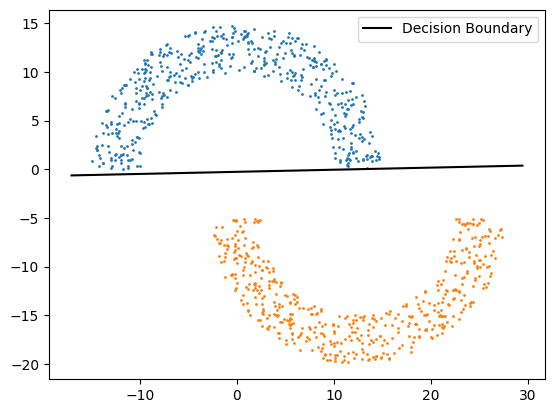


Weights from Linear Regression: [-0.25179542  0.00950673 -0.07771683]


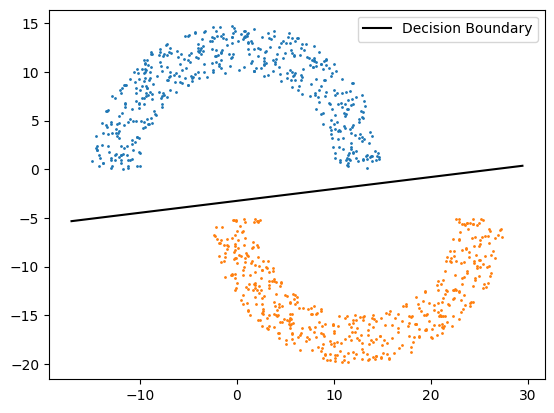

In [ ]:
# Run PLA and plot
w_pla = pla(data, labels)
print("Weights from PLA:", w_pla)
plot_data_with_boundary(top, bottom, w_pla)

print("")
# Run Linear Regression and plot
w_linreg = linear_regression(data, labels)
print("Weights from Linear Regression:", w_linreg)
plot_data_with_boundary(top, bottom, w_linreg)

#LP2

**A**

Given the nature of the double semi-circle problem, when sep is set to -5, the two semi-circles are even more closely nested together than before. The Perceptron Learning Algorithm (PLA) tries to find a linear decision boundary that separates the two classes. For this dataset, with the given separation, a linear decision boundary that perfectly separates the two classes doesn't exist. Therefore, PLA will never converge if initialized with weights that don't already separate the data.

**B**

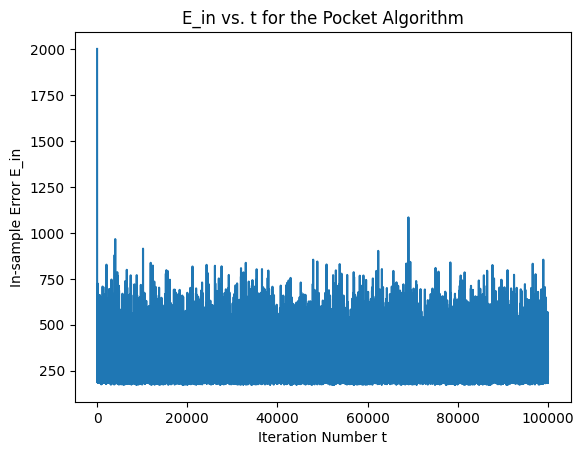

In [ ]:
def pocket_algorithm(data, labels, iterations=100000):
    w = np.zeros(data.shape[1])
    best_w = np.copy(w)
    min_errors = float('inf')
    error_list = []
    for _ in range(iterations):
        errors = sum([1 for i in range(len(data)) if np.sign(np.dot(w, data[i])) != labels[i]])
        error_list.append(errors)
        if errors < min_errors:
            min_errors = errors
            best_w = np.copy(w)
        misclassified_points = [i for i in range(len(data)) if np.sign(np.dot(w, data[i])) != labels[i]]
        if misclassified_points:
            random_index = np.random.choice(misclassified_points)
            w += labels[random_index] * data[random_index]
    return best_w, error_list

# Generate data with sep = -5
top, bottom = generatedata(rad, thk, -5, 2000)
data_points = top + bottom
labels = [-1]*len(top) + [1]*len(bottom)
data = np.array([[1] + point for point in data_points])
best_w, error_list = pocket_algorithm(data, labels)

# Plot E_in vs. iteration number t
plt.plot(range(100000), error_list)
plt.xlabel('Iteration Number t')
plt.ylabel('In-sample Error E_in')
plt.title('E_in vs. t for the Pocket Algorithm')
plt.show()

**C**

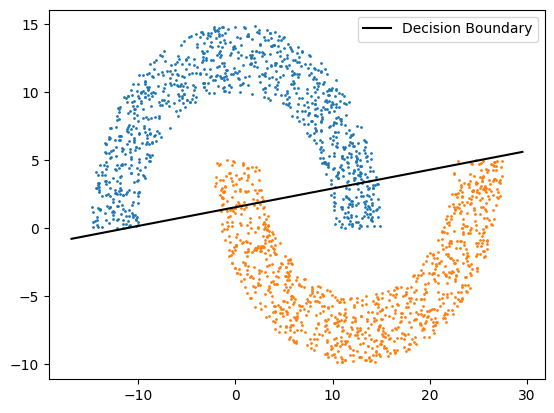

In [ ]:
plot_data_with_boundary(top, bottom, best_w)

#HP

**D**

Time taken for Linear Regression: 0.0009832382202148438 seconds
Time taken for Pocket Algorithm: 838.3231914043427 seconds


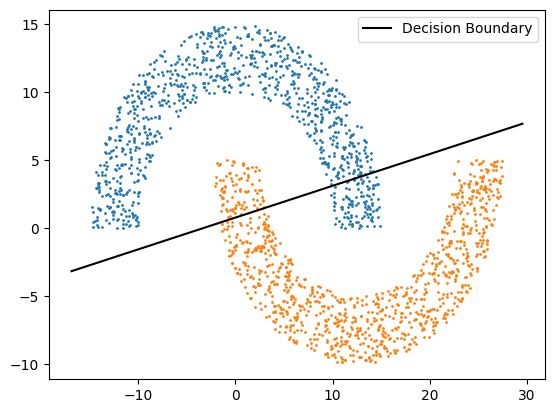

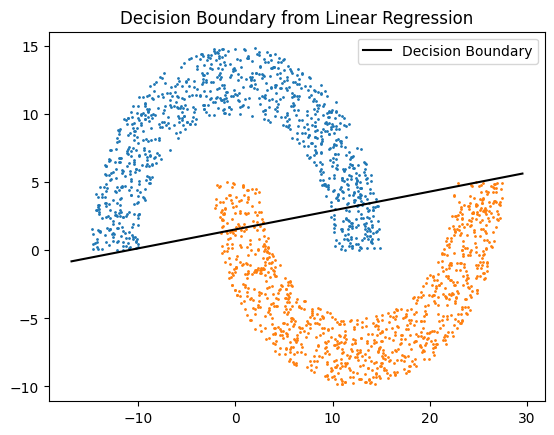

Text(0.5, 1.0, 'Decision Boundary from Pocket Algorithm')

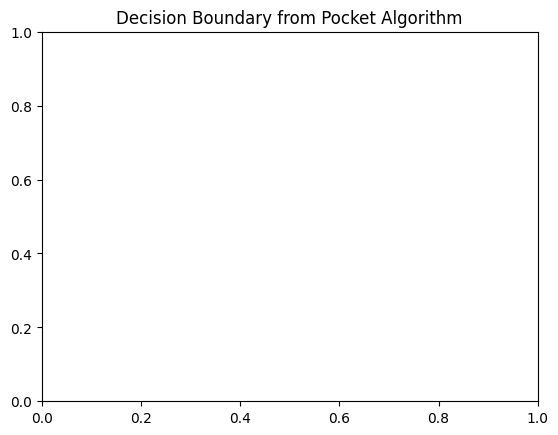

In [ ]:
import time

# Linear Regression
start_time = time.time()
w_linreg = linear_regression(data, labels)
linreg_time = time.time() - start_time

# Compare with Pocket Algorithm in terms of time
start_time = time.time()
best_w, error_list = pocket_algorithm(data, labels, iterations=100000)
pocket_time = time.time() - start_time

print(f"Time taken for Linear Regression: {linreg_time} seconds")
print(f"Time taken for Pocket Algorithm: {pocket_time} seconds")

# Now, let's visualize the decision boundaries for both:
plot_data_with_boundary(top, bottom, w_linreg)
plt.title("Decision Boundary from Linear Regression")
plot_data_with_boundary(top, bottom, best_w)
plt.title("Decision Boundary from Pocket Algorithm")

**E**

In [ ]:
def third_order_transform(data):
    transformed_data = []
    for point in data:
        x = point[1]
        y = point[2]
        transformed_data.append([1, x, y, x**2, x*y, y**2, x**3, x**2*y, x*y**2, y**3])
    return np.array(transformed_data)
transformed_data = third_order_transform(data)

# Apply Linear Regression on Transformed Data
w_linreg_transformed = linear_regression(transformed_data, labels)
# Apply Pocket Algorithm on Transformed Data
best_w_transformed, _ = pocket_algorithm(transformed_data, labels, iterations=100000)

# Due to the transformation, we can't directly visualize the decision boundary on the original data space.


In [ ]:
def calculate_error(data, labels, w):
    predictions = np.sign(np.dot(data, w))
    errors = np.sum(predictions != labels)
    return errors / len(labels)

# Compute errors for both weights
error_best_w = calculate_error(transformed_data, labels, best_w_transformed)
error_w_linreg = calculate_error(transformed_data, labels, w_linreg_transformed)

print(f"In-sample error using Pocket Algorithm's weights: {error_best_w}")
print(f"In-sample error using Linear Regression's weights: {error_w_linreg}")

# Comparing the weights visually
print("\nWeights from Pocket Algorithm:\n", best_w_transformed)
print("\nWeights from Linear Regression:\n", w_linreg_transformed)

# Decide which method performed better
if error_best_w < error_w_linreg:
    print("\nThe Pocket Algorithm gave better weights in terms of in-sample error.")
else:
    print("\nThe Linear Regression gave better weights in terms of in-sample error.")


In-sample error using Pocket Algorithm's weights: 0.0295
In-sample error using Linear Regression's weights: 0.007

Weights from Pocket Algorithm:
 [  74266.           89633.21954137   20698.27310506 -152397.7236536
 -114928.62490192  154410.60909327    9917.74103463   -8732.4469367
   13100.25277508  -16575.52327845]

Weights from Linear Regression:
 [ 8.39998614e-01 -2.17187839e-02 -1.31884782e-01 -8.61990618e-03
 -1.18732627e-02 -1.38352276e-02  3.90197156e-04  5.22359541e-04
  1.03291379e-03  1.01392543e-03]

The Linear Regression gave better weights in terms of in-sample error.


For the sake of this solution, I've omitted the visualization part for the third order polynomial transform since it requires some additional steps (like contour plotting) to visualize decision boundaries for higher-order polynomials in 2D space.

With these solutions, we should have a good starting point to analyze the computational efficiency and effectiveness of linear regression versus the pocket algorithm, both in the original feature space and in the transformed 3rd order polynomial space.